In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv("supplement.csv")
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [4]:
data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [5]:
data.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [6]:
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


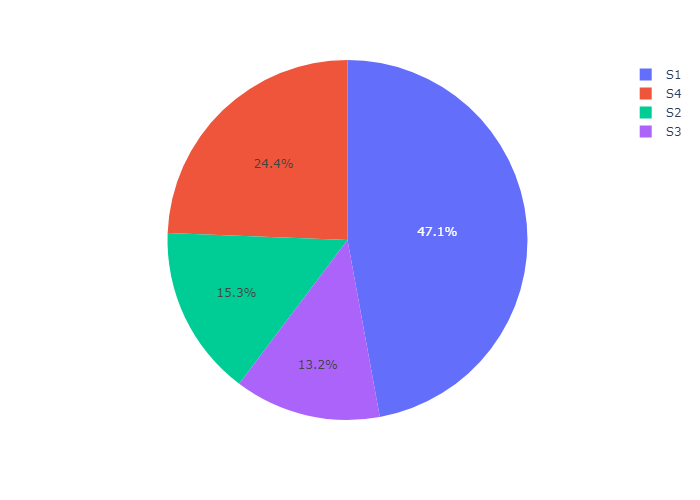

In [7]:
#distribution of the number of orders received according to the store type
import kaleido
import plotly.express as px
pie = data["Store_Type"].value_counts()
store = pie.index
orders = pie.values

fig = px.pie(data, values=orders, names=store)
fig.show("png")


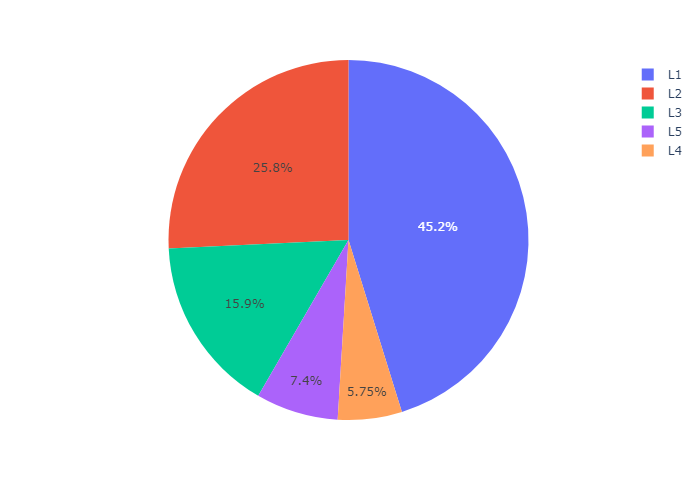

In [8]:
#distribution of the number of orders, according to the location
pie2 = data["Location_Type"].value_counts()
location = pie2.index
orders = pie2.values

fig = px.pie(data, values=orders, names=location)
fig.show("png")

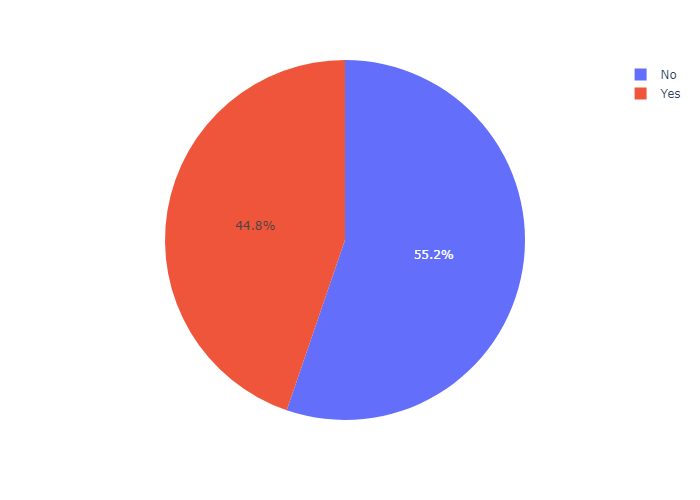

In [9]:
#distribution of the number of orders, according to the discount
pie3 = data["Discount"].value_counts()
discount = pie3.index
orders = pie3.values

fig = px.pie(data, values=orders, names=discount)
fig.show("png")

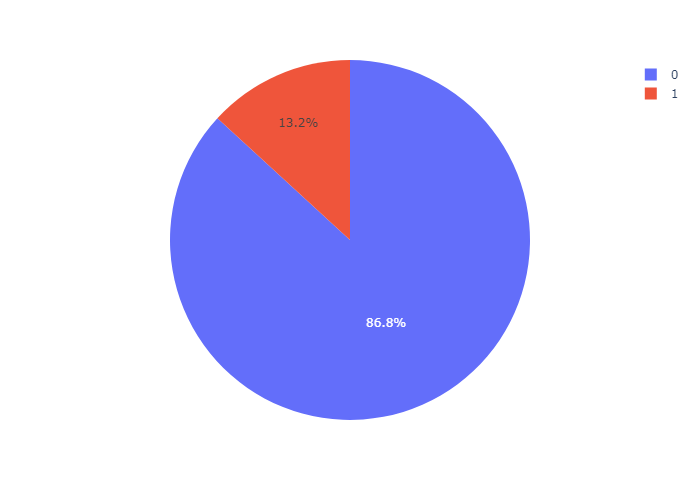

In [10]:
#how holidays affect the number of orders

pie4 = data["Holiday"].value_counts()
holiday = pie4.index
orders = pie4.values

fig = px.pie(data, values=orders, names=holiday)
fig.show("png")

In [11]:

data["Discount"] = data["Discount"].map({"No": 0, "Yes": 1})
data["Store_Type"] = data["Store_Type"].map({"S1": 1, "S2": 2, "S3": 3, "S4": 4})
data["Location_Type"] = data["Location_Type"].map({"L1": 1, "L2": 2, "L3": 3, "L4": 4, "L5": 5})
data.dropna()

x = np.array(data[["Store_Type", "Location_Type", "Holiday", "Discount"]])
y = np.array(data["#Order"])

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, 
                                                y, test_size=0.2, 
                                                random_state=42)

In [13]:
!pip install lightgbm


  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 187.9 kB/s eta 0:00:07
   - -------------------------------------- 0.0/1.3 MB 196.9 kB/s eta 0:00:07
   - -------------------------------------- 0.0/1.3 MB 196.9 kB/s eta 0:00:07
   - -------------------------------------- 0.0/1.3 MB 196.9 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.3 MB 182.2 kB/s eta 0:00:07
   -- ------------------------------------- 0.1/1.3 MB 209.0 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.3 MB 209.0 kB/s eta 0:00:06
   -- ----------------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import lightgbm as ltb
model = ltb.LGBMRegressor()
model.fit(xtrain, ytrain)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15
[LightGBM] [Info] Number of data points in the train set: 150672, number of used features: 4
[LightGBM] [Info] Start training from score 68.163401


LGBMRegressor()

In [15]:
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Orders": ypred.flatten()})
print(data.head())

   Predicted Orders
0         47.351897
1         97.068717
2         66.577788
3         85.143083
4         54.451098
